# Exercise 2 - Introduction to LLM-based text generation
In this notebook, we will explore how a large language model generates the text via next-word prediction. 

We will use the [GPT-2](https://huggingface.co/gpt2) model since it is relatively small and can be run on small hardware like your laptop. 

However, the same principles apply to larger models like Gemini or GPT-4o.

GPT-2 is free and available on Hugging Face, so we will use this library to access it. To do this, we need to import the following utility function.


In [1]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

In the following code, we load the GPT-2 tokenizer and model. If you run this for the first time, it will download the model and tokenizer. This might take a little bit of time.
However, it only has to do this once. After that, it will be cached on your machine.


In [2]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

## Exercise 2a - Next word prediction
Let's explore the next word prediction of the capabilities of GPT-2.
Run the cells below to see the next word prediction distribution for the text in the `text` variable.
Play around with the different parameters and see what happens.
Then ask yourself the following questions:
- What happens if you make small changes to the text? For example, can you replace 'go' with 'visit'?
- What happens if you make the temperature very low? E.g., 0.0001 or even 0?
- What happens if you make the temperature very high? E.g., 2 or even 5?
- What happens if you change the top_k parameter?
- What happens if you change the top_p parameter to a very low value? E.g., 0.1 or even 0.01? (Note: make sure you set the temperature to 1)
- What happens if you change the top_p parameter to a high value? E.g., 0.9 or even 0.99? (Note: make sure you set the temperature to 1)

To help you with this, we have created the following utility functions.
- `get_probs_next_word_top_k`: Given a text, this function returns the `k` most likely next words and their probabilities.
- `get_probs_next_word_top_p`: Given a text, this function returns the next words and their probabilities until the cumulative probability of the next word is larger than the `top_p`.
- `plot_probabilities`: Plots the probabilities of the next words as a bar chart.

Let's import these functions and try them out.


In [3]:
from llm_in_production.huggingface_utils import get_probs_next_word_top_k, get_probs_next_word_top_p
from llm_in_production.visualization_utils import plot_probabilities

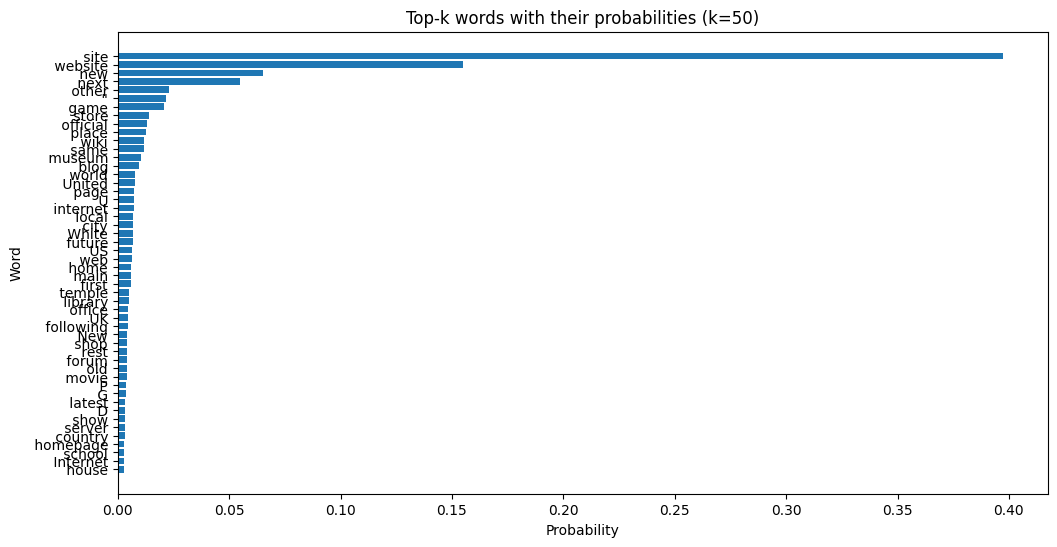

In [37]:
text = "Hi, do you want to visit the "
k = 50 # play with this parameter
temperature = 0.6 # play with this parameter
renormalize = True # If true, it shows the probabilities as to how they will be sampled. If false, it shows the original probabilities.

topk_words, topk_probs = get_probs_next_word_top_k(tokenizer, model, text, k=k, temperature=temperature)
plot_probabilities(topk_words, topk_probs, renormalize=renormalize, title=f"Top-k words with their probabilities (k={k})")


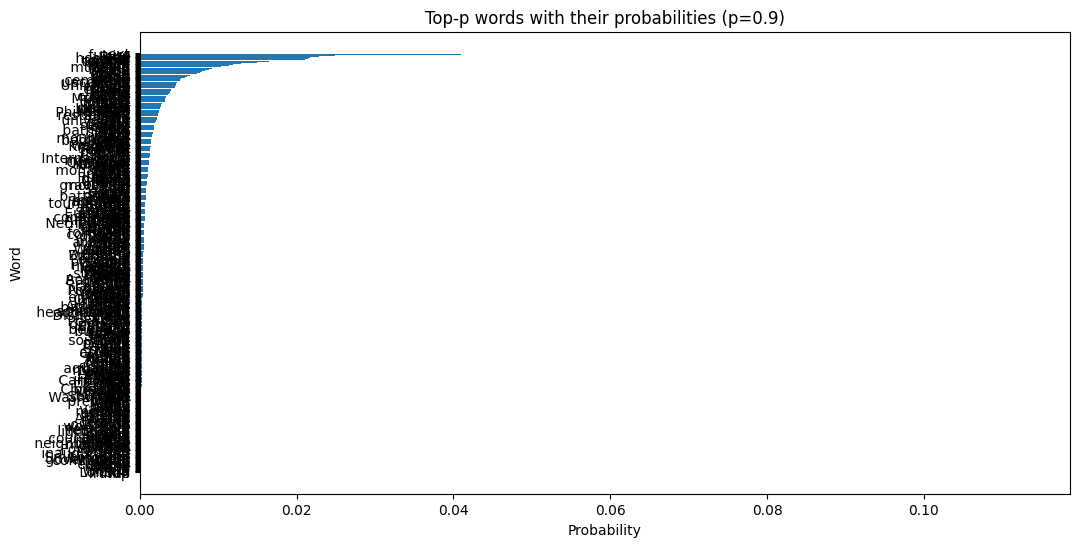

In [25]:
text = "Hi, do you want to visit to the"
top_p = 0.9 # play with this parameter
temperature = 0.6 # play with this parameter
renormalize = False # If true, it shows the probabilities as to how they will be sampled. If false, it shows the original probabilities.

topk_words, topk_probs = get_probs_next_word_top_p(tokenizer, model, text, top_p=top_p, temperature=temperature)
plot_probabilities(topk_words, topk_probs, renormalize=renormalize, title=f"Top-p words with their probabilities (p={top_p})")

## Exercise 2b - Text generation
We have now seen what the effect of the different parameters is on the next-word prediction distribution.
Now, let's go a step further and generate more than one word. To do this, we use the `generate` function of the model.
In this function, we can again change the `temperature,` `top_p`, and `top_k` parameters. 

Run the cell below to generate a sequence that completes the `text` variable.
Play around with the different parameters and see what happens.
Then ask yourself the following questions:
- What happens if you make small changes to the text? For example, can you replace 'go' with 'visit'?
- What happens if you make the temperature very low? E.g., 0.0001 or even 0?
- What happens if you make the temperature very high? E.g., 2 or even 5?
- What happens if you change the top_k parameter?
- What happens if you change the top_p parameter to a very low value? E.g., 0.1 or even 0.01? (Note: make sure you set the temperature to 1)
- What happens if you change the top_p parameter to a high value? E.g., 0.9 or even 0.99? (Note: make sure you set the temperature to 1)
- What happens if you generate longer sequences? (What happens with the quality of the text?)


In [42]:
text = "Hi, do you want to go the " # feel free to change this text
top_k = 20 # play with this parameter
top_p = 0.7 # play with this parameter
temperature = 0.9 # play with this parameter
max_new_tokens = 30 # Increase this parameter to generate more text, but remember that the larger the text, the longer it takes to generate.
eps = 1e-9 # small number to avoid log(0)

# Here we encode the text to tokens the model understands
tokens = tokenizer.encode_plus(text, return_tensors='pt')
# Here we generate the text
result = model.generate(
    **tokens, 
    max_new_tokens=max_new_tokens,
    do_sample=True, # If this is False, it uses greedy selects (token with max prob).
    top_k=top_k, 
    top_p=top_p,
    temperature=temperature + eps,
    pad_token_id=model.config.eos_token_id, 
)
# Here we decode the tokens back to strings
generate_text = tokenizer.decode(result[0])
print(generate_text)

Hi, do you want to go the vernacular, or is that something you want to do?

I don't know, it's kind of like, "Yeah, I'm


---